# **Optimizing online sports retail revenue**

In this notebook, we perform an exploratory data analysis on retail data from an online sports clothing company. The purpose is to dive into product data such as pricing, reviews, descriptions, ratings, revenues and website traffic, to provide recommendations for its marketing and sales teams.

The database provided to us, _sports_, contains five tables, with _product\_id_ being the primary key for all of them. We perform a data cleaning process to address missing value, data type conversion and, eventually provide insights on the onlin retail features and improvement solutions.

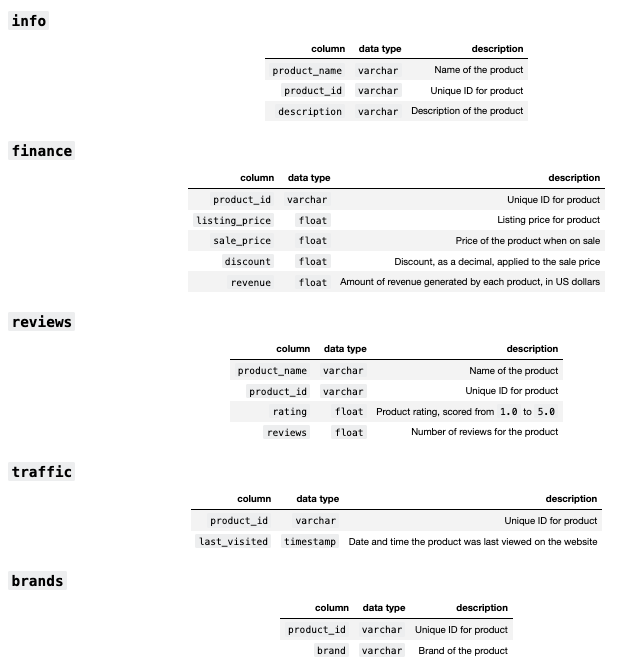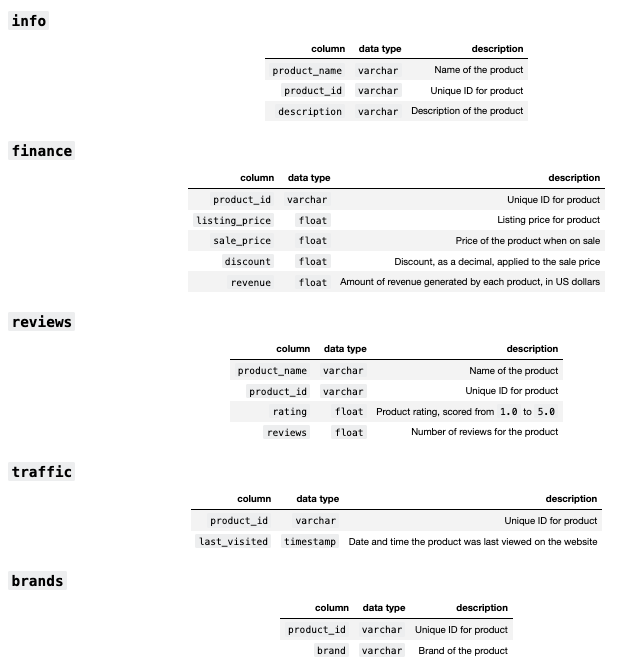

## 1\. Missing data

In [2]:
SELECT COUNT(*) AS total_rows,
       COUNT(i.description) AS count_description,
       COUNT(f.listing_price) AS count_listing_price,
       COUNT(t.last_visited) AS count_last_visited
FROM info AS i
LEFT JOIN finance AS f
ON i.product_id = f.product_id

LEFT JOIN traffic AS t
ON i.product_id = t.product_id;

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:01.253

total_rows,count_description,count_listing_price,count_last_visited
3179,3117,3120,2928


## 2\. Nike v.s. Adidas pricing

We can see the database contains 3,179 products in total. Of the columns we previewed, only one — _last__visited_ — is missing more than five percent of its values. Now let's turn our attention to pricing.

<span style="font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);">How do the price points of Nike and Adidas products differ? Answering this question can help us build a picture of the company's stock range and customer market. We will run a query to produce a distribution of the *listing_price*&nbsp;and the count for each price, grouped by *brand*.</span>

In [3]:
SELECT b.brand,
       CAST(f.listing_price AS integer),
       COUNT(f.product_id)
FROM brands AS b
INNER JOIN finance AS f
ON b.product_id = f.product_id
WHERE f.listing_price > 0
GROUP BY b.brand, f.listing_price
ORDER BY f.listing_price DESC;

(77 rows affected)

Total execution time: 00:00:00.054

brand,(No column name),(No column name)
Adidas,299,2
Adidas,279,4
Adidas,239,5
Adidas,229,8
Adidas,219,11
Adidas,199,8
Nike,199,1
Adidas,189,7
Nike,189,2
Adidas,179,34


## 3\. Categorizing price range

It turns out there are 77 unique prices for the products in our database, which makes the output of our last query quite difficult to analyze.

Let's build on our previous query by assigning labels to different price ranges, grouping by _brand_ and _label_. We will also include the total _revenue_ for each price range and _brand_.

In [4]:
WITH price_category_CTE AS (
    SELECT b.brand, f.revenue, f.listing_price,
    CASE WHEN f.listing_price < 42 THEN 'budget'
         WHEN f.listing_price >= 42 AND f.listing_price < 74 THEN 'Average'
         WHEN f.listing_price >= 74 AND f.listing_price < 129 THEN 'Expensive'
         ELSE 'Elite' END AS price_category
    FROM finance AS f
    INNER JOIN brands AS b
        ON f.product_id = b.product_id
    WHERE b.brand IS NOT NULL
)

SELECT brand, COUNT(*) AS count, SUM(revenue) AS total_revenue, price_category
FROM price_category_CTE
GROUP BY brand, price_category
ORDER BY total_revenue DESC;

Warning: Null value is eliminated by an aggregate or other SET operation.

(8 rows affected)

Total execution time: 00:00:00.689

brand,count,total_revenue,price_category
Adidas,849,4626980.069999999,Expensive
Adidas,1060,3233661.060000001,Average
Adidas,307,3014316.8299999987,Elite
Adidas,359,651661.1200000002,budget
Nike,357,595341.0199999992,budget
Nike,82,128475.59000000003,Elite
Nike,90,71843.15000000004,Expensive
Nike,16,6623.5,Average


## 4\. Average discount by brand

## [](https://sessions.datacamp.com/proxy/absolute/dfce98d7-15ae-4199-9606-e23a77d528a1/notebooks/production/users/9686901/75xnol3yw6/notebooks/notebook.ipynb#4.-Average-discount-by-brand)

<span style="font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);">Interestingly, grouping products by brand and price range allows us to see that Adidas items generate more total revenue regardless of price category! Specifically, "Elite"&nbsp;</span> <span style="background-color: rgb(255, 255, 255);">Adidas products priced&nbsp;</span> <span style="font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255); box-sizing: border-box;">$</span><span style="background-color: rgb(255, 255, 255);">129 or more typically generate the highest revenue, so the company can potentially increase revenue by shifting their stock to have a larger proportion of these products!</span>

<span style="font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);">Note we have been looking at <em>listing_price</em></span> <span style="background-color: rgb(255, 255, 255);">so far. The&nbsp;</span>  <span style="font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);"><em>listing_price</em>&nbsp;</span>  <span style="background-color: rgb(255, 255, 255);">may not be the price that the product is ultimately sold for. To understand <em>revenue</em></span> <span style="background-color: rgb(255, 255, 255);">better, let's take a look at the <em>discount</em></span> <span style="background-color: rgb(255, 255, 255);">which is the percent reduction in the&nbsp;</span> <span style="background-color: rgb(255, 255, 255); font-family: &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif;"><em>listing_price</em></span> <span style="background-color: rgb(255, 255, 255);">when the product is actually sold. We would like to know whether there is a difference in the amount of <em>discount</em>&nbsp;</span>  <span style="background-color: rgb(255, 255, 255);">offered between brands, as this could be influencing <em>revenue</em>.</span>

In [5]:
SELECT b.brand,
    AVG(f.discount)*100 AS average_discount
FROM brands AS b
INNER JOIN finance AS f
    ON b.product_id = f.product_id
WHERE b.brand IS NOT NULL
GROUP BY b.brand;

Warning: Null value is eliminated by an aggregate or other SET operation.

(2 rows affected)

Total execution time: 00:00:00.991

brand,average_discount
Nike,0
Adidas,33.452427184465606


## 5\. Correlation between revenue and reviews[¶](https://sessions.datacamp.com/proxy/absolute/dfce98d7-15ae-4199-9606-e23a77d528a1/notebooks/production/users/9686901/75xnol3yw6/notebooks/notebook.ipynb#5.-Correlation-between-revenue-and-reviews)

Strangely, no _discount_ <span style="font-family: -apple-system, BlinkMacSystemFont, sans-serif; color: var(--vscode-foreground);">&nbsp;is offered on Nike products! In comparison, not only do Adidas products generate the most revenue, but these products are also heavily discounted!</span>

To improve revenue further, the company could try to reduce the amount of discount offered on Adidas products, and monitor sales volume to see if it remains stable. Alternatively, it could try offering a small discount on Nike products. This would reduce average revenue for these products, but may increase revenue overall if there is an increase in the volume of Nike products sold.

Now explore whether relationships exist between the columns in our database. We will check the strength and direction of a correlation between _revenue_ and _reviews_.

In [6]:
WITH Means AS (
    SELECT AVG(r.reviews) as mean_reviews,
           AVG(f.revenue) as mean_revenue
    FROM reviews AS r
    INNER JOIN finance AS f ON r.product_id = f.product_id
),

Covar AS (
    SELECT SUM((r.reviews - mean_reviews) * (f.revenue - mean_revenue)) / COUNT(*) as covar
    FROM reviews AS r
    INNER JOIN finance AS f ON r.product_id = f.product_id
    CROSS JOIN Means
),

StdDevs AS (
    SELECT SQRT(SUM(POWER(r.reviews - mean_reviews, 2)) / COUNT(*)) as std_dev_reviews,
           SQRT(SUM(POWER(f.revenue - mean_revenue, 2)) / COUNT(*)) as std_dev_revenue
    FROM reviews AS r
    INNER JOIN finance AS f ON r.product_id = f.product_id
    CROSS JOIN Means
)

SELECT covar / (std_dev_reviews * std_dev_revenue) as review_revenue_corr
FROM Covar, StdDevs;


Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.179

review_revenue_corr
0.6518512283481309


## 6\. Ratings and reviews by product description length

Interestingly, there is a strong positive correlation between _reviews_ and _revenue_. This means, potentially, if we can get more reviews on the company's website, it may increase sales of those items with a larger number of reviews.

Perhaps the length of a product's _description_ might influence a product's _rating_ and _reviews_ — if so, the company can produce content guidelines for listing products on their website and test if this influences _revenue_. Let's check this out!

In [7]:
SELECT CAST(ROUND(LEN(i.description)/100.0, 0) * 100 AS INT) AS description_length,
       ROUND(AVG(CAST(r.rating AS float)), 2) AS average_rating
FROM info AS i
INNER JOIN reviews AS r
    ON i.product_id = r.product_id
WHERE i.description IS NOT NULL
GROUP BY CAST(ROUND(LEN(i.description)/100.0, 0) * 100 AS INT)
ORDER BY description_length;


Warning: Null value is eliminated by an aggregate or other SET operation.

(8 rows affected)

Total execution time: 00:00:00.079

description_length,average_rating
0,1.5
100,3.22
200,3.22
300,3.3
400,3.32
500,3.29
600,3.39
700,3.82


## 7\. Reviews by month and brand

Unfortunately, there doesn't appear to be a clear pattern between the length of a product's _description_ and _rating_.

As we know a correlation exists between _reviews_ and _revenue_, one approach the company could take is to run experiments with different sales processes encouraging more reviews from customers about their purchases, such as by offering a small discount on future purchases.

Let's take a look at the volume of _revenue_ by month to see if there are any trends or gaps we can look to exploit.

In [8]:
SELECT 
    b.brand, 
    MONTH(t.last_visited) AS month, 
    COUNT(r.reviews) AS num_reviews
FROM brands AS b
INNER JOIN traffic AS t 
    ON b.product_id = t.product_id
INNER JOIN reviews AS r 
    ON t.product_id = r.product_id
WHERE b.brand IS NOT NULL
GROUP BY b.brand, MONTH(t.last_visited)
ORDER BY b.brand, month;

Warning: Null value is eliminated by an aggregate or other SET operation.

(26 rows affected)

Total execution time: 00:00:00.143

brand,month,num_reviews
Adidas,NULL,198
Adidas,1,253
Adidas,2,272
Adidas,3,269
Adidas,4,180
Adidas,5,172
Adidas,6,159
Adidas,7,170
Adidas,8,189
Adidas,9,181


## 8\. Footwear product performance

Looks like product reviews are highest in the first quarter of the calendar year, so there is scope to run experiments aiming to increase the volume of reviews in the other nine months!

So far, we have been primarily analyzing Adidas vs Nike products. Now, let's switch our attention to the type of products being sold. As there are no labels for product type, we will create a Common Table Expression (CTE) that filters _description_ for keywords, then use the results to find out how much of the company's stock consists of footwear products and the average _revenue_ generated by these items.

In [9]:
WITH footwear AS (
    SELECT i.description, f.revenue
    FROM info AS i
    INNER JOIN finance AS f 
        ON i.product_id = f.product_id
    WHERE (UPPER(i.description) LIKE '%SHOE%'
        OR UPPER(i.description) LIKE '%TRAINER%'
        OR UPPER(i.description) LIKE '%FOOT%')
        AND i.description IS NOT NULL
)

SELECT COUNT(*) AS num_footwear_products, 
    AVG(revenue) AS average_footwear_revenue
FROM footwear;



Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.148

num_footwear_products,average_footwear_revenue
2700,4235.461314814836


## 9\. Clothing product performance

From our previous query, we founf there are 3,117 products without missing values for _description._ Of those, 2,700 are footwear products, which accounts for about 85% of the company's stock. They generate an average revenue of over $4,000.

  

But we still don't know whether footwear's _average\_revenue_ is good or bad compared to other products. We will then examine how it differs to clothing products. We will still use _footwear_, adding a filter afterward to count the number of products and _average\_revenue_ of products that are not in _footwear_.

In [10]:
WITH footwear AS
(
    SELECT i.description, f.revenue
    FROM info AS i
    INNER JOIN finance AS f 
        ON i.product_id = f.product_id
    WHERE (i.description LIKE '%shoe%'
        OR i.description LIKE '%trainer%'
        OR i.description LIKE '%foot%')
        AND i.description IS NOT NULL
)

SELECT COUNT(*) AS num_clothing_products, 
    AVG(f.revenue) AS average_clothing_revenue
FROM info AS i
INNER JOIN finance AS f on i.product_id = f.product_id
WHERE i.description NOT IN (SELECT description FROM footwear);


Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:03.508

num_clothing_products,average_clothing_revenue
417,2080.244964028777


There are less clothing products for sale with half of footwear average revenue. So the marketing strategy should be focused on prompting more footwear sales.

## 10\. Conclusion

Based on the explorary data analysis, we can provide four key findings:

1. There are in total of 77 unique products on the online retail platform. And it is good for targeting customers with different needs;
2. Compared to Nike, the store has more expensive ( higher than $129) Adidas products, has higher average discount;
3. There is a strong positive relationship between customer reviews upon products and retail revenue. Most of customer reviews occurred in Q1;
4. Compared to clothing category, footwear has more products and brings more revenue.

Accordingly, we can provide the following four suggestions to optimize online retail revenues:

1. The store should increase the stock of Adidas products that are $129 or higher;
2. To promote the sale of Nike products, the store can offer discounts;
3. The store should incentivize customers provide reviews, especially during Q1;
4. The store should optimize its inventory by increasing footwear stock